In [1]:
#Find d in sorted array

In [23]:
import math
import random
from datetime import datetime

In [47]:
NUM_TESTS = 25

In [8]:
def get_array(number_of_items):
    array = []
    a = 0
    b = a + 10
    for i in range(0,number_of_items):
        array.append(random.randint(a,b))
        a = b+1
        b = a + 10
    return array

In [16]:
def get_diff_and_index(array):
    lower_index = 0
    upper_index = 0
    while True:
        lower_index = random.randint(0,len(array)-1)
        upper_index = random.randint(0,len(array)-1)

        if upper_index > lower_index:
            break
        elif upper_index < lower_index:
            lower_index,upper_index = upper_index,lower_index
            break

    #print ("upper & lower index",lower_index,upper_index)
    #print (array)
    d = array[upper_index] - array[lower_index]

    return d, lower_index, upper_index

In [17]:
def get_the_index(array,d):
    #print ("Distance",d)
    j = 1
    counter = 1
    found = False
    end_loop = False
    for i in range(0,len(array)-1):
        counter += 1
        if i == j:
            j += 1
        while True:
            counter += 1
            if array[j] - array[i] == d:
                found = True
                break
            elif array[j] - array[i] < d:
                j += 1
                if j > len(array) - 1:
                    end_loop = True
                    break
            elif array[j] - array[i] > d:
                break
        if end_loop:
            break
        if found:
            break
    
    #print ("Counter", counter)
    if found:
        return (i,j,counter)
    else:
        return (0,0,counter)

In [175]:
def get_the_index2(array,d):
    #print ("Distance",d)
    j = 1
    counter = 1
    found = False
    end_loop = False
    i = 0
    while j < len(array) and i < len(array):
        counter += 1
        if i == j:
            j += 1
        if array[j] - array[i] == d:
            found = True
            break
        elif array[j] - array[i] < d:
            j += 1
        elif array[j] - array[i] > d:
            i += 1
    
    
    #print ("Counter", counter)
    if found:
        return (i,j,counter)
    else:
        return (0,0,counter)

In [187]:
n = 10
array = get_array(n)
print (array)
d, lower_index, upper_index = get_diff_and_index(array)
print ("difference",d, lower_index, upper_index)
i,j,counter = get_the_index2(array,d)
print ("final",i,j,counter)

[8, 12, 31, 34, 47, 58, 72, 84, 97, 101]
difference 39 0 4
final 0 4 5


In [177]:
results = []
n = 10
N = 1000
while n < N:
    num_of_tests = 0
    execution_times = []
    counter_array = []
    while num_of_tests < NUM_TESTS:
        #print (num_of_tests)
        array = get_array(n)
        d, lower_index, upper_index = get_diff_and_index(array)
        start=datetime.now()
        i,j,counter = get_the_index2(array,d)
        end=datetime.now()
        counter_array.append(counter)
        execution_times.append((end-start).microseconds)
        #if i == lower_index and j == upper_index:
        #    results.append({"n": n,"result": "success", "counter": counter, "message": ""})
        #else:
        #    results.append({"n": n,"result": "failure", "counter": counter, "message": f"expected lower: {lower_index}, expected_upper: {upper_index}, actual lower: {i}, actual upper: {j}"})
        num_of_tests += 1
        if num_of_tests >= NUM_TESTS:
            results.append({"array_length": n,"execution_time":np.percentile(execution_times,99),"90_counter":  np.percentile(counter_array, 90),"99_counter":  np.percentile(counter_array, 99),"75_counter":  np.percentile(counter_array, 75)})
    n += 1
    #print ("Value of n",n)

#print (results)

In [153]:
n

1000

In [178]:
import pandas as pd
import numpy as np
import math

In [179]:
df = pd.DataFrame.from_dict(results)

In [180]:
df.head()

,array_length,execution_time,90_counter,99_counter,75_counter
0,10,5.76,14.0,15.00,9.0
1,11,6.76,15.2,16.76,13.0
2,12,8.76,15.2,20.28,12.0
3,13,4.00,16.2,17.76,14.0
4,14,4.00,17.2,19.76,14.0


In [181]:
def return_nlogn(row):
    return row["array_length"]*math.log(row["array_length"],2)

In [182]:
df["nlogn"] = df.apply(lambda row: return_nlogn(row), axis=1)

In [183]:
df.head()

,array_length,execution_time,90_counter,99_counter,75_counter,nlogn
0,10,5.76,14.0,15.00,9.0,33.219281
1,11,6.76,15.2,16.76,13.0,38.053748
2,12,8.76,15.2,20.28,12.0,43.019550
3,13,4.00,16.2,17.76,14.0,48.105716
4,14,4.00,17.2,19.76,14.0,53.302969


<AxesSubplot:>

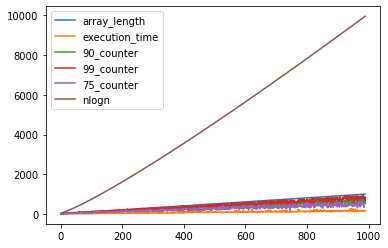

In [186]:
df.plot.line()

In [ ]:
#Locally stable

In [111]:
def is_stable(array,i,j,k):
    global counter
    counter += 1
    if array[i] > array[j] and array[j] < array[k]:
        return True
    elif (array[i] > array[j] and array[j] > array[k]) or (array[i] < array[j] and array[j] > array[k]):
        if k+1 >= len(array):
            return False
        elif array[k] > array[k+1]:
            if k+2 >= len(array):
                return False
            else:
                return is_stable(array,i+2,j+2,k+2)
        else:
            return True
    elif array[i] < array[j] and array[j] <array[k]:
        if k+2 >= len(array):
            return False
        else:
            return is_stable(array,i+2,j+2,k+2)

In [112]:
counter = 0

In [113]:
def get_unsorted_distinct_array(number_of_items):
    max_value = number_of_items*10
    min_value_index = random.randint(0,number_of_items-1)
    array = []
    prev_value = 2
    while number_of_items > 0:
        if min_value_index == number_of_items:
            number = 1
        else:
            number = random.randint(prev_value+1,prev_value+30)
            prev_value = number
        if array.count(number) > 0:
            continue
        else:
            array.append(number)
            number_of_items = number_of_items -1
    return array

In [123]:
results = []
number_of_items = 10
N = 1000
while number_of_items < N:
    num_test = 0
    counter_array = []
    while num_test < NUM_TESTS:
        counter = 0
        array = get_unsorted_distinct_array(number_of_items=number_of_items)
        #print (array)
        i =0
        j = 1
        k = 2

        result = is_stable(array,i,j,k)
        counter_array.append(counter)
        num_test += 1
    results.append({"array_length": number_of_items,"90_counter":  np.percentile(counter_array, 90),"99_counter":  np.percentile(counter_array, 99),"75_counter":  np.percentile(counter_array, 75)})
    number_of_items += 1

In [124]:
number_of_items

1000

In [125]:
def return_logn(row):
    return math.log(row["array_length"],2)

In [126]:
df = pd.DataFrame.from_dict(results)

In [127]:
df.head()

,array_length,90_counter,99_counter,75_counter
0,10,4.0,4.0,3.0
1,11,5.0,5.0,4.0
2,12,5.0,5.0,4.0
3,13,6.0,6.0,6.0
4,14,6.0,6.0,6.0


In [128]:
df["logn"] = df.apply(lambda row: return_logn(row), axis=1)

In [129]:
df.tail()

,array_length,90_counter,99_counter,75_counter,logn
985,995,471.2,490.64,391.0,9.958553
986,996,462.4,483.96,407.0,9.960002
987,997,464.0,488.60,390.0,9.961450
988,998,454.2,489.84,376.0,9.962896
989,999,460.6,490.16,391.0,9.964341


<AxesSubplot:>

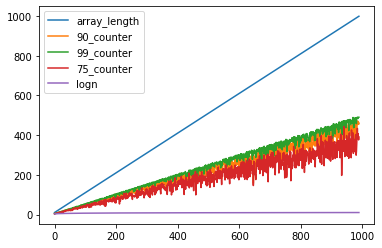

In [130]:
df.plot.line()

In [110]:

counter = 1
array = get_unsorted_distinct_array(number_of_items=11)
array = [20, 39, 44, 45, 70, 77, 103, 120, 131, 144, 1]
print (array)
print (is_stable(array,0,1,2))
print (counter)

[20, 39, 44, 45, 70, 77, 103, 120, 131, 144, 1]


IndexError: list index out of range

In [139]:
def is_stable2(array):
    global counter
    counter += 1
    l = len(array)
    mid = l // 2
    arr1 = array[0:mid]
    arr2 = array[mid:]

    if (arr1[-1] < arr1[-2] and arr1[-1] < arr2[0]) or (arr2[0] < arr2[1] and arr2[0] < arr1[-1]):
        return True


    if len(arr1) == 3:
        if arr1[1] < arr1[0] and arr1[1] < arr1[2]:
            return True
    if len(arr2) == 3:
        if arr2[1] < arr2[0] and arr2[1] < arr2[2]:
            return True

    if len(arr1) <= 3:
        return False
    
    if  len(arr2) <= 3:
        return False

    arr1_result = is_stable2(arr1)
    if arr1_result:
        return True
    else:
        return is_stable2(arr2)

In [171]:
from datetime import datetime
results = []
number_of_items = 10
N = 10000
while number_of_items < N:
    num_test = 0
    counter_array = []
    while num_test < NUM_TESTS:
        counter = 0
        array = get_unsorted_distinct_array(number_of_items=number_of_items)
        #print (array)
        start = datetime.now()
        result = is_stable2(array)
        end = datetime.now()
        counter_array.append(counter)
        num_test += 1
    results.append({"array_length": number_of_items,"execution_time": (end-start).microseconds})
    number_of_items += 1

KeyboardInterrupt: 

In [164]:
df = pd.DataFrame.from_dict(results)

In [165]:
df.head()

,array_length,execution_time
0,10,4
1,11,521
2,12,2
3,13,2
4,14,1


In [166]:
df["logn"] = df.apply(lambda row: return_logn(row), axis=1)

<AxesSubplot:>

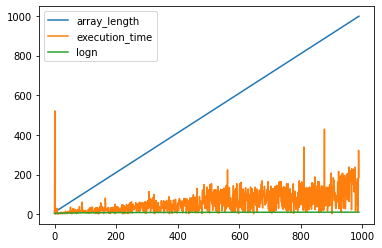

In [170]:
df.plot.line()

In [168]:
df.set_index('array_length')

,execution_time,logn
array_length,,
10,4,3.321928
11,521,3.459432
12,2,3.584963
13,2,3.700440
14,1,3.807355
...,...,...
995,10,9.958553
996,70,9.960002
997,118,9.961450


In [161]:
df

,array_length,execution_time,90_counter,99_counter,75_counter,nlogn
0,10,0,21.0,24.28,18.0,33.219281
1,11,0,19.6,21.76,16.0,38.053748
2,12,0,21.8,24.52,17.0,43.019550
3,13,0,18.0,30.08,16.0,48.105716
4,14,0,24.2,25.76,21.0,53.302969
...,...,...,...,...,...,...
985,995,0,719.4,842.36,548.0,9908.759952
986,996,0,789.4,850.20,607.0,9920.161924
987,997,0,585.8,719.64,396.0,9931.565345
988,998,0,604.8,881.52,486.0,9942.970213


In [192]:
array1 = [1,2,3,4,5]
array2 = [6,7,8,9]

In [ ]:
d = {}
for i in array1:
    d[i] = 1

In [191]:
d

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

In [190]:
for item in array2:
    

In [ ]:
array = [ 3 4 8 19 22 35 56]
d = 15

In [ ]:
n1, n2, n3, n4, n5, n6, n7, n8

n1, n2,n3,n4                 n5, n6, n7,n8
    n3, n4, n5 or n4, n5, n6
    
